In [132]:
# Probability based models :

# 1. Naive Bayes Classifier


In [133]:
# test_inatance
xd = {'outlook':'sunnny', 'temprature':'cool', 'humidity':'high', 'wind':'strong'}

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [136]:
df = pd.read_excel('/content/fruitdata.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color_score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [137]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


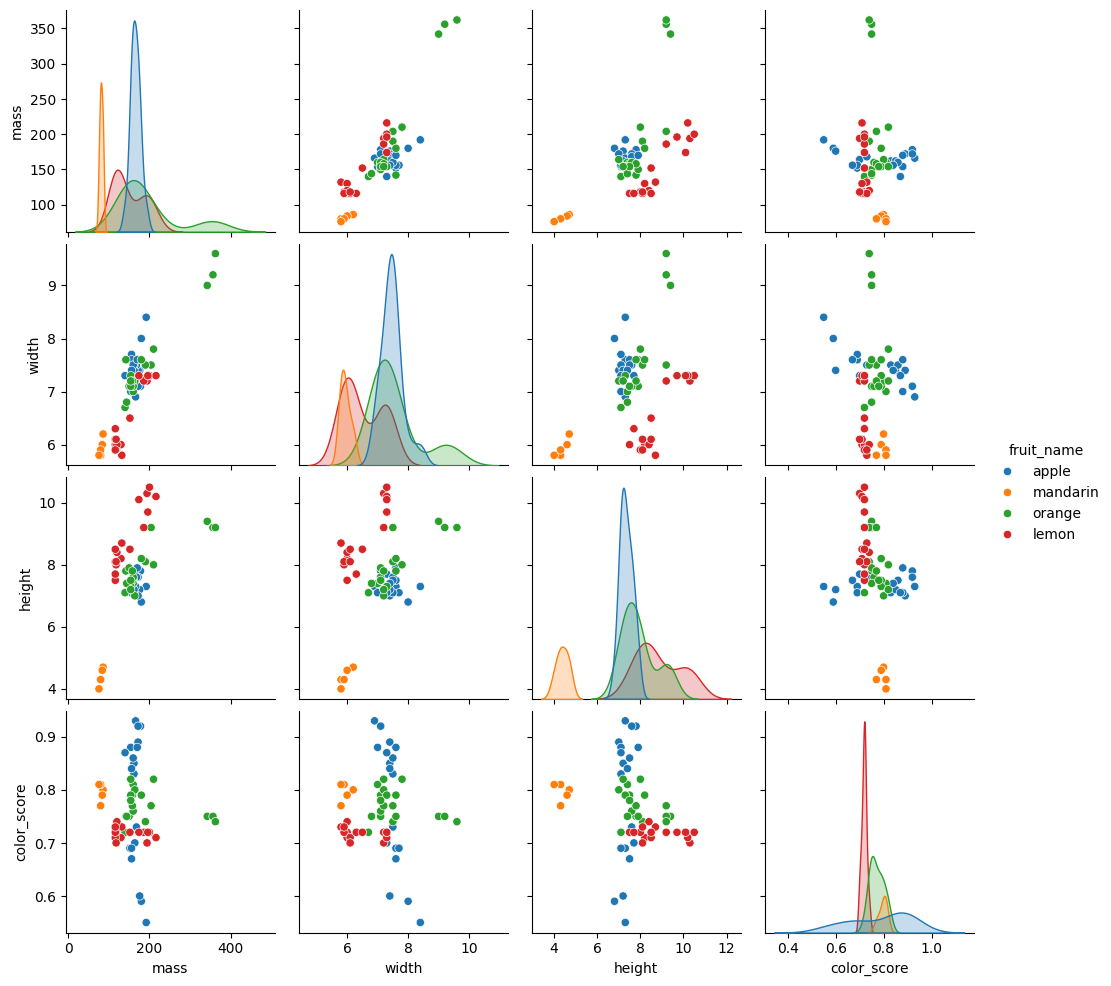

In [121]:
sns.pairplot(df.drop('fruit_label', axis=1), hue='fruit_name')


In [122]:
# see feature importance using random forest, because visually this dataset seems useless

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
df.drop(columns='fruit_name', inplace=True)

In [125]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values
sc = StandardScaler()
xscaled = sc.fit_transform(x)

In [144]:
xtrain,xtest,ytrain,ytest = train_test_split(xscaled,y,test_size=0.2,random_state=90)


In [145]:
rfmodel = RandomForestClassifier(6)
rfmodel.fit(xtrain,ytrain)
rfmodel.feature_importances_

array([0.06256319, 0.11565099, 0.27150803, 0.5502778 ])

In [146]:
# no feature is less important than 10%, we can't drop any feature

In [147]:
yhatrf = rfmodel.predict(xtest)

In [148]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yhatrf))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.95      0.94      0.94        12
weighted avg       0.93      0.92      0.92        12



In [149]:
nbmodel = GaussianNB()
nbmodel.fit(xtrain,ytrain).score(xtest,ytest)

1.0

In [151]:
# training score
nbmodel.score(xtrain,ytrain)

0.8085106382978723

In [153]:
yhatnb = nbmodel.predict(xtest)
print(classification_report(ytest,yhatnb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

